# Deep Learning with Keras

To use Keras, will need to have the TensorFlow package installed. See detailed instructions. https://www.tensorflow.org/install

Once TensorFlow is installed, just import Keras via:

In [1]:
from tensorflow import keras # No need for installation on Google Colab

### Input layers

In [2]:
# Import Input from keras.layers
from keras.layers import Input
# Create an input layer of shape 1
input_tensor = Input(shape=(1,))

https://keras.io/api/layers/core_layers/input/

tf.keras.Input(
    shape=None,
    batch_size=None,
    name=None,
    dtype=None,
    sparse=None,
    tensor=None,
    ragged=None,
    type_spec=None,
    **kwargs
)
Arguments


*   shape: A shape tuple (integers), not including the batch size. For instance, shape=(32,) indicates that the expected input will be batches of 32-dimensional vectors. Elements of this tuple can be None; 'None' elements represent dimensions where the shape is not known.
*   batch_size: optional static batch size (integer).

* name: An optional name string for the layer. Should be unique in a model (do not reuse the same name twice). It will be autogenerated if it isn't provided.
* dtype: The data type expected by the input, as a string (float32, float64, int32...)
*  sparse: A boolean specifying whether the placeholder to be created is sparse. Only one of 'ragged' and 'sparse' can be True. Note that, if sparse is False, sparse tensors can still be passed into the input - they will be densified with a default value of 0.
*  tensor: Optional existing tensor to wrap into the Input layer. If set, the layer will use the tf.TypeSpec of this tensor rather than creating a new placeholder tensor.
* ragged: A boolean specifying whether the placeholder to be created is ragged. Only one of 'ragged' and 'sparse' can be True. In this case, values of 'None' in the 'shape' argument represent ragged dimensions. For more information about RaggedTensors, see this guide.
*   type_spec: A tf.TypeSpec object to create the input placeholder from. When provided, all other args except name must be None.
* **kwargs: deprecated arguments support. Supports batch_shape and batch_input_shape.


### Dense layers

https://keras.io/api/layers/core_layers/dense/

units=10
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
)

Arguments

* units: Positive integer, dimensionality of the output space.
* activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
* use_bias: Boolean, whether the layer uses a bias vector.
*  kernel_initializer: Initializer for the kernel weights matrix.
* bias_initializer: Initializer for the bias vector.
* kernel_regularizer: Regularizer function applied to the kernel weights matrix.
* bias_regularizer: Regularizer function applied to the bias vector.
* activity_regularizer: Regularizer function applied to the output of the layer (its "activation").
* kernel_constraint: Constraint function applied to the kernel weights matrix.
* bias_constraint: Constraint function applied to the bias vector.


In [3]:
# Load layers
from keras.layers import Input, Dense

# Input layer
input_tensor = Input(shape=(1,))

# Dense layer
output_layer = Dense(1)

# Connect the dense layer to the input_tensor
output_tensor = output_layer(input_tensor)

This network will take the input, apply a linear coefficient to it, and return the result.

The output layer allows your model to make predictions.

### Build a model

In [4]:
# Input/dense/output layers
from keras.layers import Input, Dense
input_tensor = Input(shape=(1,),name='input')
output_tensor = Dense(1, name='dense1')(input_tensor)

# Build the model
from keras.models import Model
model = Model(input_tensor, output_tensor)

### Compile a model

This finalizes your model, freezes all its settings, and prepares it to meet some data!

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

### Visualize a model

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1 (Dense)                       │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

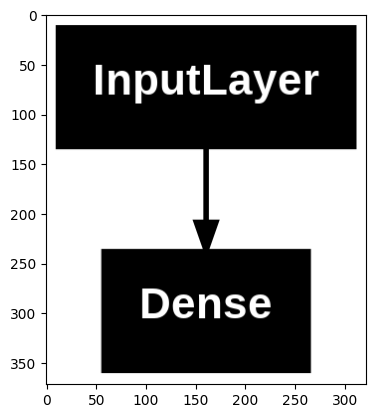

In [6]:
# Import the plotting function
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Summarize the model
model.summary()

# # Plot the model
plot_model(model, to_file='model.png')
# # Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

In [7]:
print(model.get_weights())

[array([[-0.2572037]], dtype=float32), array([0.], dtype=float32)]


# Sequential class

tf.keras.Sequential(layers=None, name=None)

Sequential groups a linear stack of layers into a tf.keras.Model.

Sequential provides training and inference features on this model.

Optionally, the first layer can receive an `input_shape` argument:

In [8]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(50, input_shape=(20, ), name='dense1'))
model.add(Dense(30, name='dense2'))
model.add(Dense(1, name='dense3'))
model.compile(optimizer='sgd', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense1 (Dense)                       │ (None, 50)                  │           1,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense2 (Dense)                       │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense3 (Dense)                       │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,611 (10.20 KB)

 Trainable params: 2,611 (10.20 KB)

 Non-trainable params: 0 (0.00 B)

For Multiple Observations

In [9]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(50, input_shape=(20, 25), name='dense1'))
model.add(Dense(30, name='dense2'))
model.add(Dense(1, name='dense3'))
model.compile('rmsprop', 'mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense1 (Dense)                       │ (None, 20, 50)              │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense2 (Dense)                       │ (None, 20, 30)              │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense3 (Dense)                       │ (None, 20, 1)               │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,861 (11.18 KB)

 Trainable params: 2,861 (11.18 KB)

 Non-trainable params: 0 (0.00 B)

# Example on Heart Disease Dataset



In [10]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(50, input_shape=(2,), name='dense1'))
model.add(Dense(30, name='dense2'))
model.add(Dense(1, name='dense3'))
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense1 (Dense)                       │ (None, 50)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense2 (Dense)                       │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense3 (Dense)                       │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,711 (6.68 KB)

 Trainable params: 1,711 (6.68 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import pandas as pd

df = pd.read_csv('heart_disease_dataset_UCI.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.shape

(303, 14)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['age','sex']], df['target'])

In [14]:
# Now fit the model
model.fit(X_train, y_train,
          epochs=1,
          batch_size=128,
          validation_split=.10,
          verbose=True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 7.0033 - val_loss: 6.9315


### Evaluate the model on a test set

In [15]:
# Evaluate the model on the test data
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - loss: 7.8893


8.180960655212402

## Multiple Outputs

### Simple two-output model

In [16]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(50, input_shape=(2,), name='dense1'))
model.add(Dense(30, name='dense2'))
model.add(Dense(2, name='output'))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense1 (Dense)                       │ (None, 50)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense2 (Dense)                       │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 2)                   │              62 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,742 (6.80 KB)

 Trainable params: 1,742 (6.80 KB)

 Non-trainable params: 0 (0.00 B)

### Fit a model with two outputs

In [17]:
# Fit the model
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'sex']], df[['target','thal']])
model.fit(X_train, y_train,
  		  verbose=False,
  		  epochs=10,
  		  batch_size=64)

In [18]:
# Evaluate the model
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - loss: 22.5948


22.5865421295166

In [19]:
# Print the model's weights
print(model.get_weights())


[array([[ 2.25428045e-01,  1.56419784e-01, -2.08135664e-01,
         2.15767443e-01, -2.37660766e-01,  2.06303239e-01,
         3.11228275e-01, -2.01036125e-01,  2.71217823e-01,
         7.27898479e-02,  1.39513463e-01,  8.16639066e-02,
        -1.89900845e-01, -2.52067089e-01,  1.68281913e-01,
         1.35097265e-01,  1.37422562e-01,  2.21027315e-01,
        -1.65632918e-01, -5.90337515e-02, -1.36113733e-01,
        -5.94521463e-02,  3.38974833e-01,  2.13911831e-02,
        -3.01703870e-01, -2.27936506e-02, -3.02865714e-01,
         3.29498053e-01,  5.72127104e-02,  8.41377974e-02,
         2.98617303e-01,  1.18189901e-01, -2.65125096e-01,
        -1.27491057e-02, -8.70496929e-02, -2.30738521e-03,
        -2.43608922e-01,  8.43097270e-02,  2.62515783e-01,
         1.03208393e-01,  4.95980680e-02, -2.24365741e-01,
         5.28977215e-02,  1.63782120e-01,  3.19789231e-01,
         3.11874449e-02, -2.15150252e-01, -1.68343142e-01,
         1.39753520e-01, -7.06712306e-02],
       [-2.9

### Classification and regression in one model

In [20]:
# Create an input layer with 2 columns
input_tensor = Input((2,))
# Create the first output
output_tensor_1 = Dense(1, activation='linear', use_bias=False)(input_tensor)

# Create the second output (use the first output as input here)
output_tensor_2 = Dense(1, activation='sigmoid', use_bias=False)(output_tensor_1)

# Create a model with 2 outputs
model = Model(input_tensor, [output_tensor_1, output_tensor_2])

### Compile and fit the model

In [21]:
# Import the Adam optimizer
from keras.optimizers import Adam

# Compile the model with 2 losses and the Adam optimzer with a higher learning rate
# Use learning_rate instead of lr
model.compile(loss=['mean_absolute_error', 'binary_crossentropy'], optimizer=Adam(learning_rate=0.01))

# Fit the model to the training data, with 2 inputs and 2 outputs
model.fit(df[['age', 'sex']],
          [df[['chol']], df[['target']]],
          epochs=10,
          verbose=True,
          batch_size=16384)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - dense_1_loss: 179.4062 - dense_2_loss: 23.5715 - loss: 202.9778
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step - dense_1_loss: 178.8557 - dense_2_loss: 23.4472 - loss: 202.3029
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - dense_1_loss: 178.3051 - dense_2_loss: 23.3177 - loss: 201.6228
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - dense_1_loss: 177.7544 - dense_2_loss: 23.1828 - loss: 200.9372
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - dense_1_loss: 177.2034 - dense_2_loss: 23.0426 - loss: 200.2460
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - dense_1_loss: 176.6521 - dense_2_loss: 22.8971 - loss: 199.5492
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - dense_1_loss: 176.1004 - dense_2_loss: 22.7462 - loss: 198.8467
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - dense_1_loss: 175.5484 - dense_2_loss: 22.5899 - loss: 198.1383
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - dense_1_loss: 174.9958 - d

### Inspect the model (II)

In [22]:
# Print the model weights
print(model.get_weights())

[array([[ 1.3426628],
       [-0.9084937]], dtype=float32), array([[0.6445272]], dtype=float32)]


# Keras Model with all Columns

In [23]:
# https://keras.io/api/models/sequential/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('heart_disease_dataset_UCI.csv')
X = df.iloc[:,0:13]
y = df.iloc[:,13]
X = X.values
y = y.values
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=40)

# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(13,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=100, batch_size=100)
# evaluate the keras model
_,accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 386ms/step - accuracy: 0.4776 - loss: 0.7607
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5096 - loss: 0.7533 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5021 - loss: 0.7402
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5121 - loss: 0.7312
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5247 - loss: 0.7136
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5503 - loss: 0.7103
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5569 - loss: 0.6930
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5588 - loss: 0.6900
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5592 - loss: 0.6891
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6327 - loss: 0.6618
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5909 - loss: 0.6739
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6153 - loss: 0.6646

In [24]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 12)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 845 (3.30 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 564 (2.21 KB)

#Effect of Batch Size

In [25]:
# https://keras.io/api/models/sequential/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('heart_disease_dataset_UCI.csv')
X = df.iloc[:,0:13]
y = df.iloc[:,13]
X = X.values
y = y.values
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=40)


 Batch Size10
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.4276 - loss: 1.2034 - val_accuracy: 0.4868 - val_loss: 1.0566
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4803 - loss: 0.9569 - val_accuracy: 0.5526 - val_loss: 0.8498
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5695 - loss: 0.7883 - val_accuracy: 0.6053 - val_loss: 0.7040
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6007 - loss: 0.7087 - val_accuracy: 0.6316 - val_loss: 0.6094
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7099 - loss: 0.5707 - val_accuracy: 0.6842 - val_loss: 0.5469
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7353 - loss: 0.5567 - val_accuracy: 0.8026 - val_loss: 0.4956
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7425 - loss: 0.5172 - val_accuracy: 0.8158 - val_loss: 0.4611
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7591 - loss: 0.5011 - val_accuracy: 0.8289 - val_loss: 0.

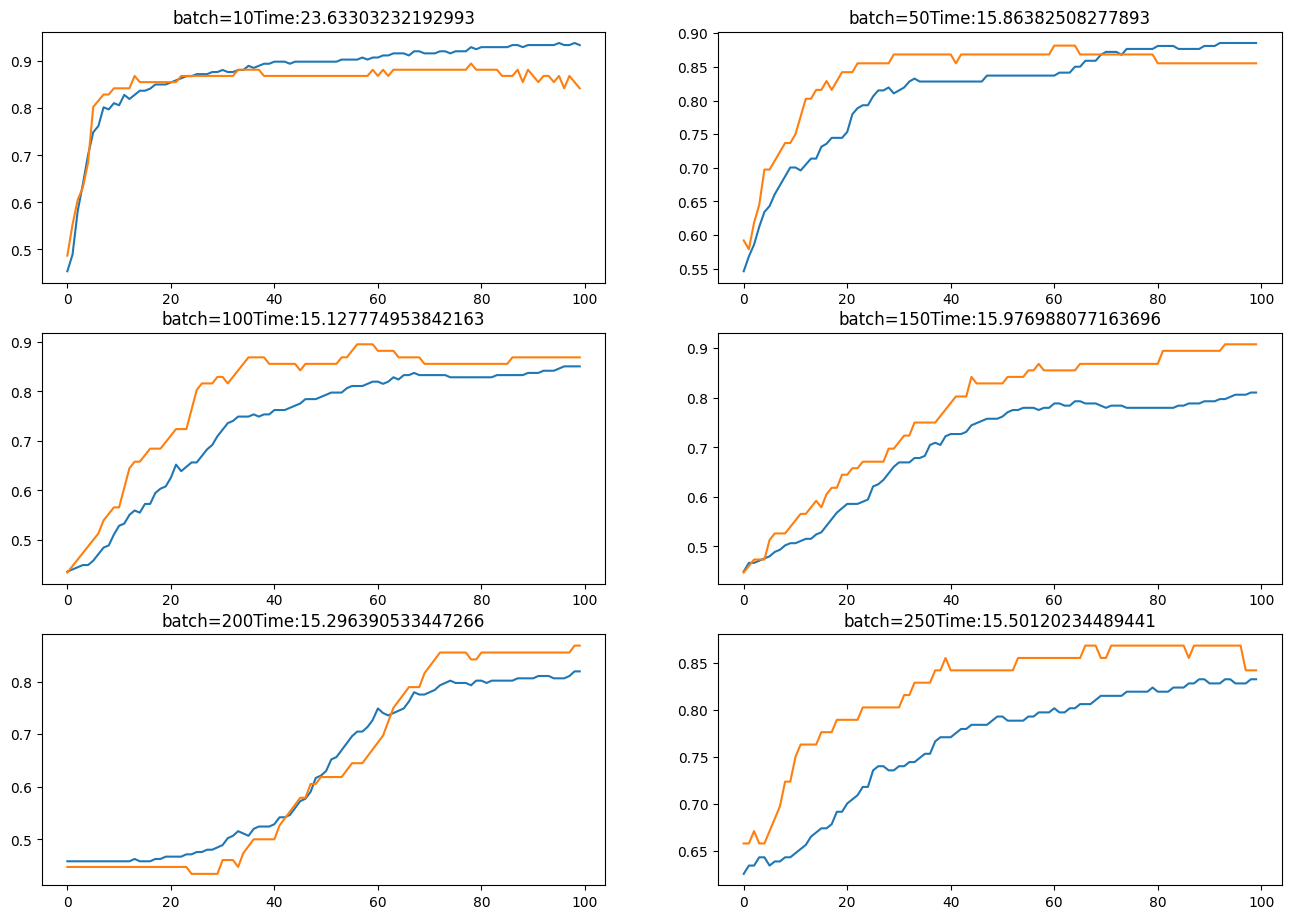

In [26]:
from time import time
batch_sizes = [10,50,100, 150,200,250]
plt.figure(figsize=(16,15))
for i in range(len(batch_sizes)):

  print('\n Batch Size'+str(batch_sizes[i]))
  start=time()

  # define the keras model
  model = Sequential()
  model.add(Dense(12, input_shape=(13,), activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # compile the keras model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1, batch_size=batch_sizes[i])

  plot_no = 420 + (i+1)

  plt.subplot(plot_no)
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.title('batch='+str(batch_sizes[i])+'Time:'+str(time()-start))
# show learning curves
plt.show()

#References
* https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
* https://github.com/ozlerhakan/datacamp/blob/master/Advanced%20Deep%20Learning%20with%20Keras%20in%20Python/Advanced-Deep-Learning-with-Keras-in-Python.ipynb
